In [157]:
import numpy as np
import pandas as pd
import networkx as nx
import time
import matplotlib.pyplot as plt

In [158]:
path = "C://Users//Dimitri//Desktop//ENSAE3A//NetworkData//Data//"

In [192]:
refs = pd.read_csv(path + "refs.csv")
cits = pd.read_csv(path + "cits.csv", header=None)
attrs = pd.read_csv(path + "attrs_nos.csv", encoding = "ISO-8859-1")

In [193]:
cits

,0
0,"['oup/qjecon/v2y1887i1p79-83..html', 'rfe/zbef..."
1,"['oup/qjecon/v2y1887i1p79-83..html', 'elg/ejee..."
2,"['oup/qjecon/v2y1887i1p79-83..html', 'ecr/col1..."
3,"['oup/qjecon/v2y1888i2p218-223..html', 'elg/ee..."
4,"['oup/qjecon/v2y1888i3p353-361..html', 'rnp/pp..."
5,"['oup/qjecon/v3y1888i1p32-59..html', 'eee/pube..."
6,"['oup/qjecon/v3y1888i1p32-59..html', 'feb/natu..."
7,"['oup/qjecon/v5y1891i3p319-338..html', 'elg/ee..."
8,"['oup/qjecon/v6y1892i2p207-226..html', 'ces/if..."
9,"['oup/qjecon/v6y1892i4p474-478..html', 'ejw/jo..."


In [194]:
def str_to_list(x):
    """
    Interpret strings of the form "['int1', 'int2']" as the list [int1, int2]
    
    Params:
        x (str) : the string to interpret
    Returns:
        list : the output list
    """
    x = x.replace("[", "")
    x = x.replace("]", "")
    x = x.replace("'", "")
    splitted = x.split(", ")
    no_list = [str(i) for i in splitted]
    return no_list

In [195]:
cits["listed"] = cits[0].apply(str_to_list)
cits["referred_to"] = cits["listed"].apply(lambda x: x[0])
cits["referring"] = cits["listed"].apply(lambda x: x[1])
cits = cits[["referred_to", "referring"]]

In [196]:
cits

,referred_to,referring
0,oup/qjecon/v2y1887i1p79-83..html,rfe/zbefri/v33y2015i1p11-35.html
1,oup/qjecon/v2y1887i1p79-83..html,elg/ejeepi/v8y2011i1p201-217.html
2,oup/qjecon/v2y1887i1p79-83..html,ecr/col111/27857.html
3,oup/qjecon/v2y1888i2p218-223..html,elg/eechap/12880_12.html
4,oup/qjecon/v2y1888i3p353-361..html,rnp/ppaper/nvg111.html
5,oup/qjecon/v3y1888i1p32-59..html,eee/pubeco/v91y2007i9p1750-1782.html
6,oup/qjecon/v3y1888i1p32-59..html,feb/natura/00478.html
7,oup/qjecon/v5y1891i3p319-338..html,elg/eechap/12880_13.html
8,oup/qjecon/v6y1892i2p207-226..html,ces/ifowps/_227.html
9,oup/qjecon/v6y1892i4p474-478..html,ejw/journl/v6y2009i2p239-263.html


In [197]:
def parse_url(url, to_remove):
    """
    Remove a given sequence from a string
    
    Params:
        url (str) : the original url.
        to_remove(str) : the string to remove
    Returns:
        str: url with string removed
    """
    return url.replace(to_remove, "")

In [198]:
# Uniformize the format of the urls
to_remove = "https://ideas.repec.org/a/"
parse_url_ideas = lambda x: parse_url(x, to_remove)
attrs["url_id"] = attrs["url"].apply(parse_url_ideas)

In [199]:
attrs

,url,title,authors,date,jel_code,keywords,editor,journal,article_id,authors_list,authors_nos,url_id
0,https://ideas.repec.org/a/oup/qjecon/v1y1886i1...,The Reaction in Political Economy,Charles F. Dunbar,1886-02-02,NaN,NaN,oup,qjecon,v1y1886i1p1-27..html,['Charles F. Dunbar'],[6160],oup/qjecon/v1y1886i1p1-27..html
1,https://ideas.repec.org/a/oup/qjecon/v1y1886i1...,Private Monopolies and Public Rights,Arthur T. Hadley,1886-02-02,NaN,NaN,oup,qjecon,v1y1886i1p28-44..html,['Arthur T. Hadley'],[3334],oup/qjecon/v1y1886i1p28-44..html
2,https://ideas.repec.org/a/oup/qjecon/v1y1886i1...,Silver Before Congress in 1886,S. Dana Horton,1886-02-02,NaN,NaN,oup,qjecon,v1y1886i1p45-75..html,['S. Dana Horton'],[36527],oup/qjecon/v1y1886i1p45-75..html
3,https://ideas.repec.org/a/oup/qjecon/v1y1886i1...,"The Arithmetic, Geometric, and Harmonic Means",F. Coggeshall,1886-02-02,NaN,NaN,oup,qjecon,v1y1886i1p83-86..html,['F. Coggeshall'],[11962],oup/qjecon/v1y1886i1p83-86..html
4,https://ideas.repec.org/a/oup/qjecon/v1y1886i1...,Legislation for Labor Arbitration,H. M. Williams,1886-02-02,NaN,NaN,oup,qjecon,v1y1886i1p86-91..html,['H. M. Williams'],[15170],oup/qjecon/v1y1886i1p86-91..html
5,https://ideas.repec.org/a/oup/qjecon/v1y1886i1...,Correspondence,Arthur Mangin,1886-02-02,NaN,NaN,oup,qjecon,v1y1886i1p91-102..html,['Arthur Mangin'],[3314],oup/qjecon/v1y1886i1p91-102..html
6,https://ideas.repec.org/a/oup/qjecon/v1y1887i2...,An Historical Sketch of the Knights of Labor,Carroll D. Wright,1887-02-02,NaN,NaN,oup,qjecon,v1y1887i2p137-168..html,['Carroll D. Wright'],[5822],oup/qjecon/v1y1887i2p137-168..html
7,https://ideas.repec.org/a/oup/qjecon/v1y1887i2...,The Disposition of Our Public Lands,Albert Bushnell Hart,1887-02-02,NaN,NaN,oup,qjecon,v1y1887i2p169-183..html,['Albert Bushnell Hart'],[1003],oup/qjecon/v1y1887i2p169-183..html
8,https://ideas.repec.org/a/oup/qjecon/v1y1887i2...,The South-Western Strike of 1886,F. W. Taussig,1887-02-02,NaN,NaN,oup,qjecon,v1y1887i2p184-222..html,['F. W. Taussig'],[31109],oup/qjecon/v1y1887i2p184-222..html
9,https://ideas.repec.org/a/oup/qjecon/v1y1887i2...,Marshall's Theory of Value and Distribution,J. Laurence Laughlin,1887-02-02,NaN,NaN,oup,qjecon,v1y1887i2p227-232..html,['J. Laurence Laughlin'],[17717],oup/qjecon/v1y1887i2p227-232..html


In [200]:
def article_matching(url_id_series, to_match):
    """
    Match url_ids from url_id_series to each element of to_match
    (concretely : transforms urls into their article_id from attrs)
    
    Params:
        url_id_series (pandas.core.series.Series) : series which index is the article number and which field is its url
        to_match (pandas.core.series.Series) : series of url to match to articles numbers in url_id_series
    
    Returns:
        pandas.core.series.Series : to_match with urls replaced by articles numbers from url_id_series
    """
    uniques = set(to_match.values)
    for url_id in uniques:
        matchs_inds = url_id_series[url_id_series == url_id].index
        if len(matchs_inds) == 1:
            num = matchs_inds[0]
        else:
            num = np.nan
        to_match[to_match == url_id] = num
    return to_match

In [201]:
# Get the series which index are the articles number and which field are their urls
id_series = attrs["url_id"]

In [202]:
def match_articles(refs_df, id_series, begin_with="referred_to"):
    """
    Match all articles in the references (or citations) dataframe.
    Matching is done first for the article to which the reference is since they are not all in our database, 
    we thus remove the deadlinks before matching the articles from which the reference originates
    which spares a lot of useless computations.
    
    Params:
        pandas.core.frame.DataFrame
        
    """
    if begin_with == "referring":
        col1 = "referring"
        col2 = "referred_to"
    else:
        col1 = "referred_to"
        col2 = "referring"
    refs_df.sort_values(by=col1, inplace=True)
    refs_df[col1] = article_matching(id_series, refs_df[col1])
    refs_df.dropna(axis=0, how="any", inplace=True)
    refs_df.sort_values(by=col2, inplace=True)
    refs_df[col2] = article_matching(id_series, refs_df[col2])
    return refs_df

In [123]:
# Match article id for all refs (TAKES 7 HOURS !)
start = time.clock()
refs = match_articles(refs, id_series)
refs.to_csv(path + "refs_id.csv")
end = time.clock()
print(end - start)

24594.01040953909


In [124]:
refs.to_csv(path + "refs_id.csv", index=False)

In [ ]:
start = time.clock()
cits = match_articles(cits, id_series, begin_with="referring")
cits.to_csv(path + "cits_id.csv")
end = time.clock()
print(end - start)

C:\Users\Dimitri\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dimitri\Anaconda3\lib\site-packages\pandas\core\generic.py:4428: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Dimitri\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [83]:
def get_edges_list(refs_df_id):
    edges_list = []
    for row in refs_df_id.iterrows():
        edges_list.append((row[1]["referring"], row[1]["referred_to"]))
    return edges_list

In [84]:
edges_list = get_edges_list(refs_reduced)

In [86]:
refs_graph = nx.DiGraph(edges_list)

In [92]:
sub_graph = nx.DiGraph(list(refs_graph.edges)[0:100])

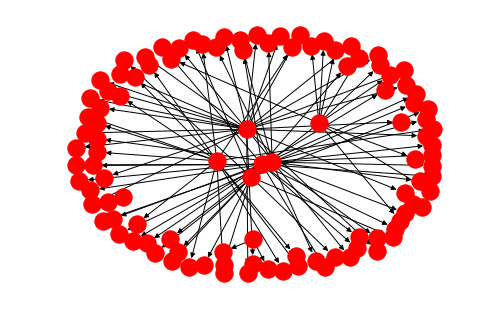

In [93]:
nx.draw(sub_graph)
plt.show()

In [94]:
refs_graph.degree

DiDegreeView({51982: 1, 10502: 4, 73739: 1, 65549: 1, 43693: 1, 4112: 4, 8209: 1, 10639: 2, 16405: 1, 4119: 1, 17071: 1, 35504: 1, 49186: 1, 4131: 2, 18823: 11, 30280: 1, 4138: 1, 4140: 4, 38735: 1, 4146: 1, 53299: 1, 12095: 1, 14345: 1, 4158: 1, 19125: 16, 4161: 1, 18824: 8, 17051: 1, 73798: 1, 4167: 1, 77898: 1, 4171: 1, 77154: 1, 18688: 1, 16233: 1, 4177: 1, 16467: 2, 4181: 2, 48558: 1, 55975: 1, 4185: 1, 38927: 1, 66971: 1, 17082: 1, 80689: 1, 45155: 1, 45157: 2, 16486: 1, 58044: 1, 8298: 2, 41067: 1, 73840: 1, 12403: 1, 38466: 1, 41662: 1, 16507: 1, 3141: 2, 77845: 1, 4229: 4, 64381: 1, 17772: 1, 18690: 6, 16523: 1, 16524: 3, 4237: 1, 4238: 2, 16527: 1, 4242: 1, 4243: 1, 4250: 1, 18827: 18, 27333: 1, 24736: 1, 78534: 1, 16553: 1, 15650: 2, 41131: 1, 4270: 1, 16564: 1, 28856: 1, 21283: 1, 4282: 1, 4283: 1, 41150: 1, 9690: 1, 4289: 1, 16583: 1, 45257: 1, 41163: 1, 4300: 1, 45261: 1, 65742: 1, 19149: 1, 8400: 3, 4305: 2, 69844: 1, 30695: 1, 18829: 36, 14372: 1, 4314: 1, 4316: 2, 1513

In [99]:
in_degree = dict(refs_graph.in_degree)

In [103]:
type(refs_graph)

networkx.classes.digraph.DiGraph

In [104]:
len(dict(in_degree))

2571

In [101]:
import scipy

In [107]:
def degree_as_scipy_sparse(nx_graph, deg_type="total"):
    
    """
    Returns the degrees diagonal matrix as a scipy sparse diag matrix
    
    Params:
        nx_graph (networkx.classes.digraph.DiGraph) : the graph
        deg_type (str) : supported = ("total", "in", "out")
    Returns:
        scipy.sparse.dia_matrix : diagonal sparse matrix of degrees
    """
    
    if deg_type == "in":
        deg_dict = dict(nx_graph.in_degree)
    elif deg_type == "out":
        deg_dict = dict(nx_graph.out_degree)
    else : 
        deg_dict = dict(nx_graph.degree)
    size = len(deg_dict)
    diag = np.zeros((size, ))
    for key in deg_dict.keys():
        diag[key] = deg_dict[key]
    diag_degrees = scipy.sparse.dia_matrix((diag, np.array([0])), shape=(size, size))
    return diag_degrees

In [110]:
refs_graph.nodes

NodeView((53738, 19115, 73739, 65549, 19117, 4112, 8209, 16405, 38990, 4119, 18959, 66696, 4783, 18437, 35504, 49186, 4131, 30280, 4138, 46656, 4140, 29871, 19120, 4146, 53299, 10249, 68061, 4158, 38367, 4161, 73798, 4167, 77898, 4171, 36194, 851, 4177, 16467, 4181, 4185, 14351, 66971, 17461, 9275, 45155, 45157, 16486, 59003, 8298, 41067, 73840, 12403, 4419, 41662, 30419, 23913, 16507, 30058, 9415, 77845, 21867, 4229, 17772, 16523, 16524, 4237, 4238, 16527, 68005, 4242, 36012, 24146, 4915, 4250, 24736, 4806, 9605, 16553, 10644, 41131, 4270, 16564, 28856, 21283, 4282, 4283, 41150, 9690, 4289, 16583, 45257, 41163, 4300, 45261, 65742, 8400, 58744, 69844, 17241, 18468, 4314, 4316, 67621, 57569, 27422, 4323, 9282, 24805, 4326, 23249, 4329, 33002, 41607, 4336, 16625, 51923, 54567, 30761, 24824, 15060, 19103, 4349, 4351, 16641, 57604, 58070, 16646, 13697, 41224, 16649, 16650, 11650, 10285, 4369, 74003, 18831, 11022, 4375, 16665, 16666, 18479, 16669, 61727, 4384, 4385, 41250, 4390, 4391, 35335

In [108]:
test = degree_as_scipy_sparse(refs_graph)

IndexError: index 51982 is out of bounds for axis 0 with size 2571

In [112]:
test = nx.directed_laplacian_matrix(refs_graph)

In [113]:
test

matrix([[  9.99611046e-01,  -2.12030162e-04,  -3.88968068e-04, ...,
          -3.89060887e-04,  -3.89153787e-04,  -3.89153787e-04],
        [ -2.12030162e-04,   9.99980552e-01,  -2.10376708e-04, ...,
          -2.07548845e-04,  -2.18342313e-04,  -2.18342313e-04],
        [ -3.88968068e-04,  -2.10376708e-04,   9.99611046e-01, ...,
          -3.88996796e-04,  -3.89275340e-04,  -3.89275340e-04],
        ..., 
        [ -3.89060887e-04,  -2.07548845e-04,  -3.88996796e-04, ...,
           9.99611046e-01,  -3.89553937e-04,  -3.89553937e-04],
        [ -3.89153787e-04,  -2.18342313e-04,  -3.89275340e-04, ...,
          -3.89553937e-04,   9.99611046e-01,  -3.88953715e-04],
        [ -3.89153787e-04,  -2.18342313e-04,  -3.89275340e-04, ...,
          -3.89553937e-04,  -3.88953715e-04,   9.99611046e-01]])